In [1]:
# Install seaborn, pandas, matplotlib, plotly, dash, and threading if necessary
!pip install seaborn pandas matplotlib plotly dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 19.0 MB/s eta 0:00:00


In [2]:
# Import the libraries with aliases
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive

In [3]:
drive.mount('/drive')

Mounted at /drive


**Project #1 - importing data**

In [4]:
df = pd.read_csv('/drive/My Drive/FINAL PROJECTS/Covid_19/project_1_python.csv')
df.head(5)

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0


**Checking completness of the df**
- Data exploration

In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180477 entries, 0 to 180476
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    180477 non-null  int64  
 1   iso_code                 180477 non-null  object 
 2   continent                180477 non-null  object 
 3   location                 180477 non-null  object 
 4   date                     180477 non-null  object 
 5   total_cases              173493 non-null  float64
 6   new_cases                173212 non-null  float64
 7   total_deaths             155323 non-null  float64
 8   new_deaths               155095 non-null  float64
 9   hosp_patients            27152 non-null   float64
 10  total_tests              78326 non-null   float64
 11  new_tests                74509 non-null   float64
 12  tests_per_case           92600 non-null   float64
 13  total_vaccinations       46366 non-null   float64
 14  peop

,index,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,total_tests,new_tests,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
count,180477.000000,1.734930e+05,1.732120e+05,1.553230e+05,155095.000000,27152.000000,7.832600e+04,7.450900e+04,9.260000e+04,4.636600e+04,4.385100e+04,4.152400e+04,1.986600e+04,3.694000e+04,1.804770e+05,159326.000000,157994.000000,179426.000000,180477.000000,180477.000000
mean,93968.446456,8.748229e+05,3.101972e+03,1.710981e+04,40.445520,4181.064783,2.082766e+07,6.707840e+04,2.433433e+03,5.903401e+07,2.179711e+07,1.819041e+07,7.832295e+06,2.700264e+05,3.742698e+07,30.594091,19662.412111,73.598154,19.549747,15.962622
std,54582.966489,4.089686e+06,1.857492e+04,6.695245e+04,183.352225,11240.365676,8.367666e+07,2.487857e+05,3.375614e+04,2.706456e+08,8.432862e+07,7.110029e+07,2.621294e+07,1.191714e+06,1.442989e+08,9.081572,20679.185182,7.489226,24.280600,68.153682
min,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.700000e+01,15.100000,661.240000,53.280000,-51.750000,-176.200000
25%,47611.000000,2.608000e+03,0.000000e+00,9.100000e+01,0.000000,152.000000,3.555605e+05,2.232000e+03,7.100000e+00,6.748762e+05,4.147615e+05,3.199945e+05,3.653900e+04,4.007500e+03,8.884560e+05,22.200000,4449.898000,69.500000,5.000000,-15.000000
50%,92730.000000,3.070300e+04,5.400000e+01,7.970000e+02,1.000000,764.500000,2.033898e+06,8.697000e+03,1.730000e+01,4.708912e+06,2.743372e+06,2.244652e+06,9.948435e+05,2.493800e+04,6.871547e+06,29.900000,12951.839000,75.050000,18.250000,18.500000
75%,140370.000000,3.041460e+05,7.330000e+02,6.461500e+03,12.000000,2956.250000,9.975426e+06,3.644000e+04,5.260000e+01,2.259239e+07,1.232842e+07,9.682117e+06,5.457455e+06,1.249542e+05,2.588704e+07,39.100000,27936.896000,79.190000,40.000000,47.658100
max,190612.000000,8.623098e+07,1.383898e+06,1.013377e+06,4529.000000,154540.000000,9.214000e+09,3.585563e+07,1.023632e+06,3.394504e+09,1.290836e+09,1.257199e+09,7.799770e+08,2.474100e+07,1.444216e+09,48.200000,116935.600000,86.750000,72.000000,178.000000


In [6]:
# Calculate completeness (missing values as SUM per each column)
misisng_values_sum = df.isnull().sum()
# Calculate completeness (missing values as MEAN/AVG per each column in %)
completeness_mean = df.isnull().mean() * 100

# Create a new DataFrame with completeness information (just to have it in nice form, not necessary)
completeness_df = pd.DataFrame({
    'Column Name':misisng_values_sum.index,
    'Missing values (Sum)': misisng_values_sum.values,
    'Missing values (%)': completeness_mean.values
})

# Display the new information table
print("Completeness Information Table:")
print(completeness_df)

Completeness Information Table:
                Column Name  Missing values (Sum)  Missing values (%)
0                     index                     0            0.000000
1                  iso_code                     0            0.000000
2                 continent                     0            0.000000
3                  location                     0            0.000000
4                      date                     0            0.000000
5               total_cases                  6984            3.869745
6                 new_cases                  7265            4.025444
7              total_deaths                 25154           13.937510
8                new_deaths                 25382           14.063842
9             hosp_patients                153325           84.955424
10              total_tests                102151           56.600564
11                new_tests                105968           58.715515
12           tests_per_case                 87877         

**Project #1 - first visualization**

> Create a ranking of the 10 countries with the largest populations using the seaborn library



In [7]:
# New DF for columns location and population and keep only unique location-population pairs without aggregating

df_analysis = df[['location', 'population']].drop_duplicates()
df_analysis

,location,population
0,Afghanistan,39835428.0
846,Albania,2872934.0
1691,Algeria,44616626.0
2536,Andorra,77354.0
3375,Angola,33933611.0
...,...,...
177424,Wallis and Futuna,11094.0
178032,Western Sahara,611872.0
178033,Yemen,30490639.0
178833,Zambia,18920657.0


In [8]:
sorted_df = df_analysis.sort_values(by='population', ascending=False).head(10) # df with top 10 countries with highest population
sorted_df

,location,population
33499,China,1.444216e+09
74570,India,1.393409e+09
170959,United States,3.329151e+08
75441,Indonesia,2.763618e+08
122998,Pakistan,2.251999e+08
21805,Brazil,2.139934e+08
118134,Nigeria,2.114007e+08
12663,Bangladesh,1.663035e+08
133450,Russia,1.459120e+08
103850,Mexico,1.302622e+08


<ipython-input-9-8f03e15bd3ec>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


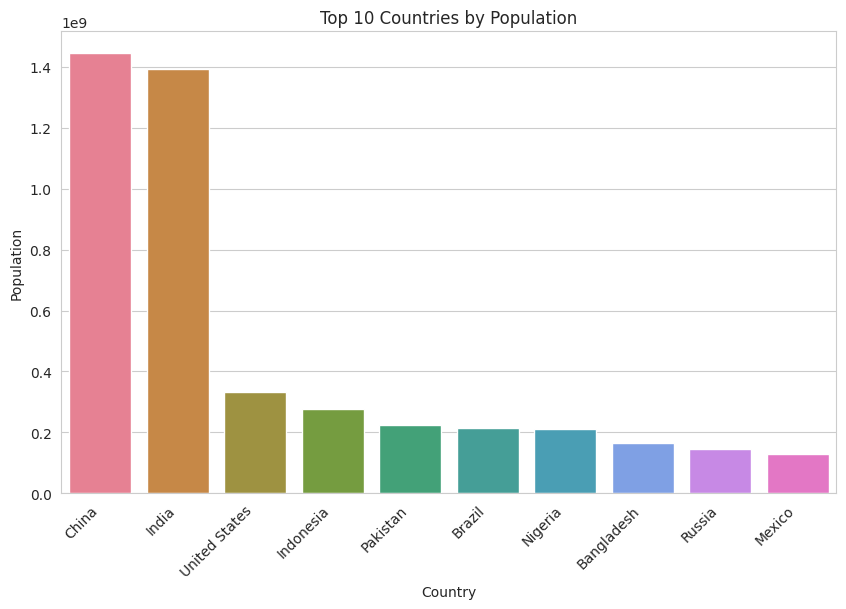

In [9]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Increase the size of the figure
sns.set_style("whitegrid")  # Use the whitegrid style

# Define a custom color palette
# custom_palette = ["#4CAF50", "#64B5F6", "#FFC107", "#FF5722", "#9C27B0", "#00BCD4", "#FF9800", "#CDDC39", "#E91E63", "#795548"]
custom_palette = sns.color_palette("husl",10)


# Plot the data with the custom color palette and set the color for the first and last bars
ax = sns.barplot(x='location', y='population', data=sorted_df, hue='location', palette=custom_palette)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 10 Countries by Population')

# Show plot
plt.show()

Which country among the selected 10 has the largest population and which has the smallest one?



```
# TOP 1st - China
# TOP 10th - Mexico
```



**Project #1 - population vs. life expectancy**



> Using your data frame and the plotly library, create a visualization that shows the relationship between population and life expectancy in a country. Do people live longer in countries that have larger populations?



In [10]:
# New DF for columns location, population, life expectancy and keep only unique values without aggregating
df_analysis_2 = df[['continent', 'location', 'population', 'life_expectancy']].drop_duplicates()
df_analysis_2

,continent,location,population,life_expectancy
0,Asia,Afghanistan,39835428.0,64.83
846,Europe,Albania,2872934.0,78.57
1691,Africa,Algeria,44616626.0,76.88
2536,Europe,Andorra,77354.0,83.73
3375,Africa,Angola,33933611.0,61.15
...,...,...,...,...
177424,Oceania,Wallis and Futuna,11094.0,79.94
178032,Africa,Western Sahara,611872.0,70.26
178033,Asia,Yemen,30490639.0,66.12
178833,Africa,Zambia,18920657.0,63.89


In [11]:
# SCATTER PLOT
fig = px.scatter(df_analysis_2, x='life_expectancy', y='population',
                 hover_name='location',
                 title='Relationship between Population and Life Expectancy',
                 labels={'population': 'Population', 'life_expectancy': 'Life Expectancy'},
                 color='continent',  # Color by continent
                 color_discrete_map={  # Define colors for each continent
                     'Asia': 'blue',
                     'Europe': 'green',
                     'Africa': 'red',
                     'North America': 'orange',
                     'South America': 'purple',
                     'Oceania': 'cyan'
                 })

# Set the x and y axes to be logarithmic (better results)
fig.update_xaxes(type='log')
fig.update_yaxes(type='log')

# Show plot
fig.show()

*Checking the Pearson Correlation coeficient - help with ChatGPT*

In [12]:
from scipy.stats import pearsonr
import numpy as np

# Remove rows with NaN or Inf values in 'life_expectancy' and 'population' columns
cleaned_df = df_analysis_2.dropna(subset=['life_expectancy', 'population'])
cleaned_df = cleaned_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['life_expectancy', 'population'])

# Select the columns of interest
life_expectancy = cleaned_df['life_expectancy']
population = cleaned_df['population']

# Calculate Pearson correlation coefficient
pearson_coefficient, p_value = pearsonr(life_expectancy, population)

# Print the Pearson coefficient
print("Pearson Correlation Coefficient:", pearson_coefficient)

Pearson Correlation Coefficient: -0.026100730354023317


*Since the Pearson coefficient ranges from -1 to 1, a value of -0.026 indicates a very weak negative correlation between these two variables. In other words, there's a slight tendency for life expectancy to decrease slightly as population increases, but the correlation is so weak that it's not practically significant.*

**Project #1 - number of diagnosed cases**

Using your data frame and the plotly library, create a visualization that shows how the number of new COVID-19 cases is distributed over time. Compare two countries of your choice.




In [13]:
# Filter data for the two chosen countries
countries = ['Slovakia', 'France']
df_countries = df[df['location'].isin(countries)]
df_countries.head(2)

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
56477,58969,FRA,Europe,France,2020-01-24,2.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67422000.0,42.0,38605.671,82.66,46.0,2.0
56478,58970,FRA,Europe,France,2020-01-25,3.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67422000.0,42.0,38605.671,82.66,46.0,2.0


In [14]:

# Define a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e']

# Line plot
fig = px.line(df_countries, x='date', y='new_cases', color='location',
              title='Distribution of New COVID-19 Cases Over Time',
              labels={'new_cases': 'New Cases', 'date': 'Date', 'location': 'Country'},
              color_discrete_sequence=custom_palette)

# Customize the layout
fig.update_layout(xaxis_title='Date',
                  yaxis_title='New Cases',
                  legend_title='Country')

# Show plot
fig.show()


**Project #1 - COVID-19 map**

Using your data frame and the plotly library, create a visualization that shows on a world map how many disease cases were reported in each country throughout the pandemic.

In [15]:
###  1. solution

# Group the data by country and calculate the total cases reported in each country (searching for max value in column total_cases)
df_total_cases = df.groupby('location')['total_cases'].max().reset_index()

# Add population column based on location
df_total_cases['population'] = df.groupby('location')['population'].first().values

# Add continent column based on location
df_total_cases['continent'] = df.groupby('location')['continent'].first().values

# Calculate the ratio of cases to population + add column cases_to_population_ratio
df_total_cases['cases_to_population_ratio'] = df_total_cases['total_cases'] / df_total_cases['population']

# Replace NaN values in 'cases_to_population_ratio' column with 0
df_total_cases['cases_to_population_ratio'].fillna(0, inplace=True)

df_total_cases


### 2. solution - just get the latest records for each country

# df_total_cases_2 = df[df['date'] == df['date'].max()]

# Calculate the ratio of cases to population
# df_total_cases_2['cases_per_person'] = df_map['total_cases'] / df_map['population']

# Replace NaN values in 'cases_to_population_ratio' column with 0
# df_total_cases_2['cases_per_person'].fillna(0, inplace=True)

# df_total_cases_2


,location,total_cases,population,continent,cases_to_population_ratio
0,Afghanistan,181574.0,39835428.0,Asia,0.004558
1,Albania,277141.0,2872934.0,Europe,0.096466
2,Algeria,265971.0,44616626.0,Africa,0.005961
3,Andorra,43449.0,77354.0,Europe,0.561690
4,Angola,99761.0,33933611.0,Africa,0.002940
...,...,...,...,...,...
221,Wallis and Futuna,454.0,11094.0,Oceania,0.040923
222,Western Sahara,NaN,611872.0,Africa,0.000000
223,Yemen,11823.0,30490639.0,Asia,0.000388
224,Zambia,324025.0,18920657.0,Africa,0.017125


In [18]:
# Create the world map visualization
fig = px.scatter_geo(df_total_cases,
                     locations='location',
                     locationmode='country names',
                     color='continent',  # Color by continent
                     size='cases_to_population_ratio',  # Size by cases to population ratio
                     hover_name='location',  # Tooltip shows the name of the country
                     hover_data={'total_cases': True},  # Additional information about the number of cases
                     title='COVID-19 Cases by Country (Marker Size = Cases to Population Ratio)',
                     projection='natural earth',  # Set the initial projection
                     opacity=0.7,  # Adjust the opacity of markers
                     color_discrete_sequence=px.colors.qualitative.Dark24,  # Use a dark color palette for continents
                    )

# Set the maximum size of the marker for readability
# Expression calculates the scaling factor for marker sizes. It doubles the maximum ratio value (to ensure markers are large enough for visibility) and divides it by the maximum marker size
fig.update_traces(marker=dict(sizeref=2.0 * max(df_total_cases['cases_to_population_ratio']) / (30 ** 2)))

# Set Mapbox style to dark
fig.update_layout(mapbox_style='dark')

# Set an appropriate initial zoom to show the entire world map
fig.update_geos(projection_type="natural earth")

# Set an appropriate title for the chart
fig.update_layout(title_text='COVID-19 Cases by Country (Marker Size = Cases to Population Ratio)')

# Show the plot
fig.show()
